In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
import os
import warnings
warnings.filterwarnings('ignore')
os.environ["PYTHONWARNINGS"] = "ignore"

In [4]:
cur_folder_name = os.getcwd().split('/')[-1]
if cur_folder_name != "fairness-variance":
    os.chdir("../../../../..")

print('Current location: ', os.getcwd())

Current location:  /Users/denys_herasymuk/UCU/4course_2term/Bachelor_Thesis/Code/fairness-variance


# Visualizations

In [5]:
from virny.utils.custom_initializers import create_models_metrics_dct_from_database_df

from source.utils.db_functions import read_model_metric_dfs_from_db
from source.custom_classes.experiments_composer import ExperimentsComposer
from source.visualizations import preprocess_metrics, create_group_base_and_fair_models_box_plot, \
    create_scatter_plot, create_bar_plot_for_model_selection

pip install 'aif360[LawSchoolGPA]'
pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'


## Initialize Configs

In [6]:
DB_COLLECTION_NAME = 'one_repair_lvl_many_models'
DATASET_NAME = 'Student_Performance_Por'
EXPERIMENT_SESSION_UUID = 'd1a5c7d4-9f88-47de-b872-3b6afaec580d'
# EXPERIMENT_SESSION_UUID = '860bd1b9-e881-4943-822f-4f8dd604428d'
# EXPERIMENT_SESSION_UUID = '5e69166c-e95f-41c8-b554-de7276d5bdf4'
SENSITIVE_ATTRS = ['sex']
MODEL_NAMES = ['LogisticRegression']
# MODEL_NAMES = ['LGBMClassifier', 'LogisticRegression', 'RandomForestClassifier', 'MLPClassifier']

In [7]:
from source.utils.db_functions import connect_to_mongodb

client, collection_obj, db_writer_func = connect_to_mongodb(DB_COLLECTION_NAME)

## Group Metrics Composition

In [8]:
model_metric_dfs = read_model_metric_dfs_from_db(collection_obj, EXPERIMENT_SESSION_UUID)
models_metrics_dct = create_models_metrics_dct_from_database_df(model_metric_dfs)
client.close()

In [9]:
# Append Test_Set_Index to each result set for models
for model_name in models_metrics_dct.keys():
    models_metrics_dct[model_name]['Test_Set_Index'] = 0

In [10]:
models_metrics_dct[list(models_metrics_dct.keys())[0]].shape

(18, 21)

In [11]:
models_metrics_dct[list(models_metrics_dct.keys())[0]][
    models_metrics_dct[list(models_metrics_dct.keys())[0]]['Experiment_Iteration'] == 'Exp_iter_1'
].head(20)

,Metric,Model_Name,Model_Params,Dataset_Name,Num_Estimators,Tag,Record_Create_Date_Time,Session_Uuid,Experiment_Iteration,Dataset_Split_Seed,...,Fair_Intervention_Params_Lst,Intervention_Param,overall,sex_dis,sex_dis_correct,sex_dis_incorrect,sex_priv,sex_priv_correct,sex_priv_incorrect,Test_Set_Index
0,Accuracy,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.840491,0.872340,1.000000,0.000000,0.797101,1.000000,0.000000,0
1,Aleatoric_Uncertainty,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.299785,0.265987,0.190422,0.782345,0.345828,0.259091,0.686581,0
2,F1,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.907801,0.929412,1.000000,0.000000,0.875000,1.000000,0.000000,0
3,FNR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.065693,0.048193,0.000000,1.000000,0.092593,0.000000,1.000000,0
4,FPR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.653846,0.727273,0.000000,1.000000,0.600000,0.000000,1.000000,0
5,IQR,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.060399,0.054178,0.038107,0.163997,0.068874,0.048255,0.149877,0
6,Jitter,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.050975,0.055852,0.028262,0.244380,0.044332,0.023273,0.127064,0
7,Label_Stability,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.927362,0.915106,0.960000,0.608333,0.944058,0.970182,0.841429,0
8,Mean_Prediction,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.147122,0.116282,0.071030,0.425503,0.189137,0.136434,0.396185,0
9,Overall_Uncertainty,LogisticRegression,"{'C': 0.001, 'class_weight': None, 'dual': Fal...",Student_Performance_Por,200,OK,2024-01-02 13:26:34.193,d1a5c7d4-9f88-47de-b872-3b6afaec580d,Exp_iter_1,100,...,"[{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}]","{'k': 10, 'Ax': 0.1, 'Ay': 0.9, 'Az': 2.0}",0.324127,0.288274,0.207936,0.837248,0.372970,0.278350,0.744692,0


In [12]:
exp_composer = ExperimentsComposer(models_metrics_dct, SENSITIVE_ATTRS)
exp_subgroup_metrics_dct = exp_composer.create_exp_subgroup_metrics_dct_for_mult_test_sets()

In [13]:
exp_group_metrics_dct = exp_composer.compose_group_metrics_for_mult_test_sets(exp_subgroup_metrics_dct)

## Figure 1. Subgroup boxplots.

In [14]:
melted_all_subgroup_metrics_per_model_dct, melted_all_group_metrics_per_model_dct = \
    preprocess_metrics(exp_subgroup_metrics_dct, exp_group_metrics_dct)

In [15]:
vals_to_replace = {
    'Model_Name': {
        'LGBMClassifier': 'LGBM',
        'LogisticRegression': 'LR',
        'RandomForestClassifier': 'RF',
        'MLPClassifier': 'MLP'
    }
}

<Figure size 1200x600 with 0 Axes>

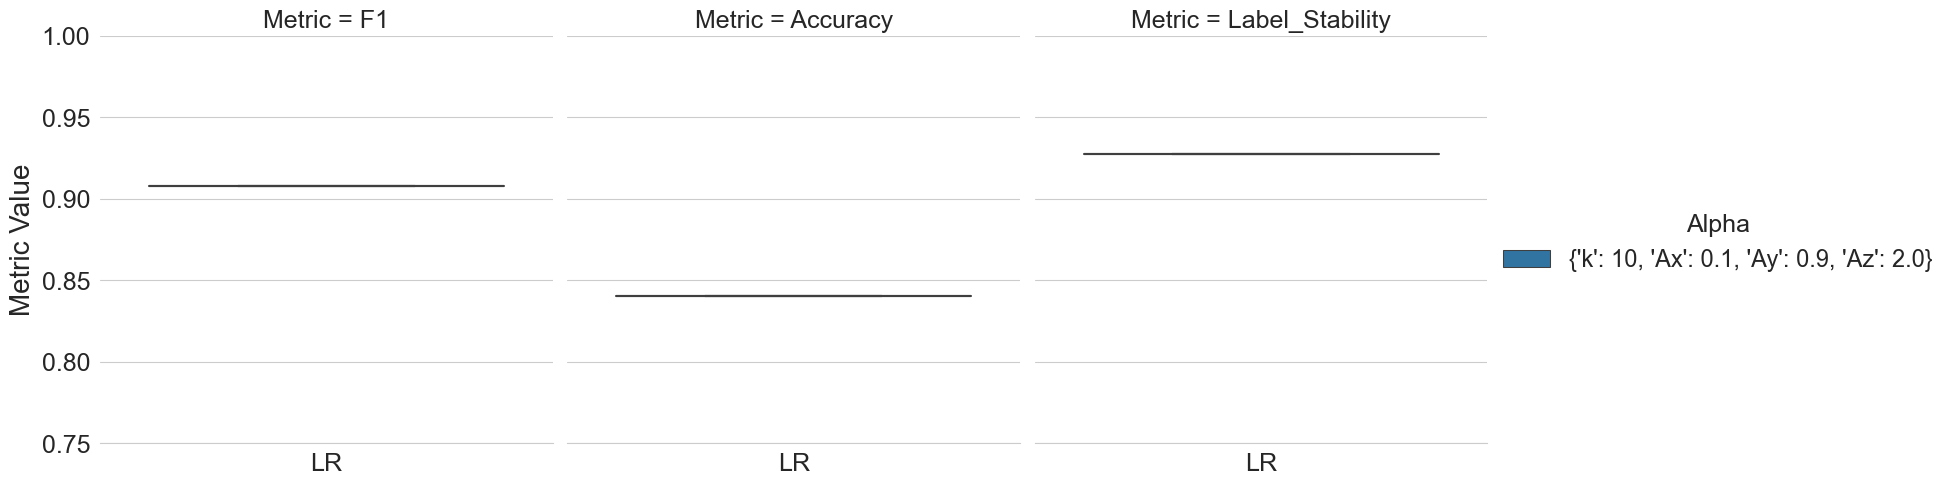

In [16]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           ylim=(0.75, 1.0),
                                           metric_names=['F1', 'Accuracy', 'Label_Stability'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

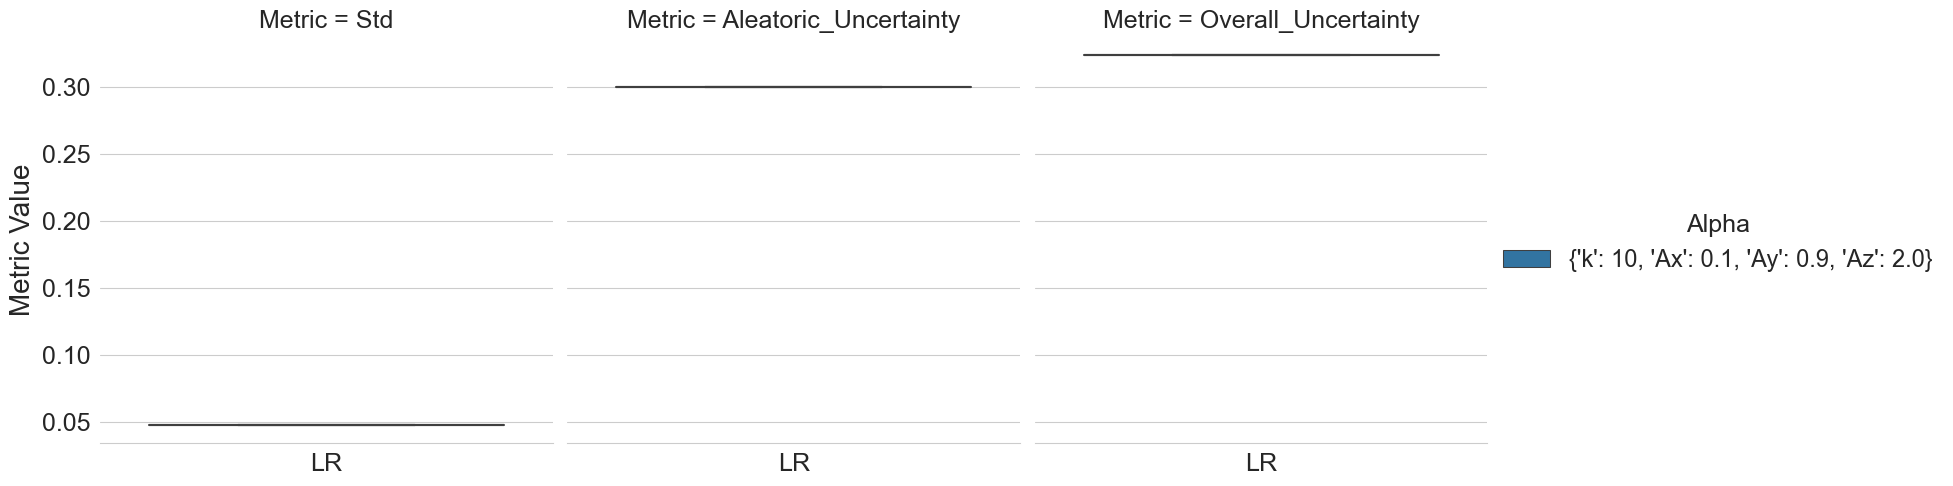

In [17]:
create_group_base_and_fair_models_box_plot(melted_all_subgroup_metrics_per_model_dct,
                                           metric_names=['Std', 'Aleatoric_Uncertainty', 'Overall_Uncertainty'],
                                           vals_to_replace=vals_to_replace)

## Figure 2. Create group boxplots.

<Figure size 1200x600 with 0 Axes>

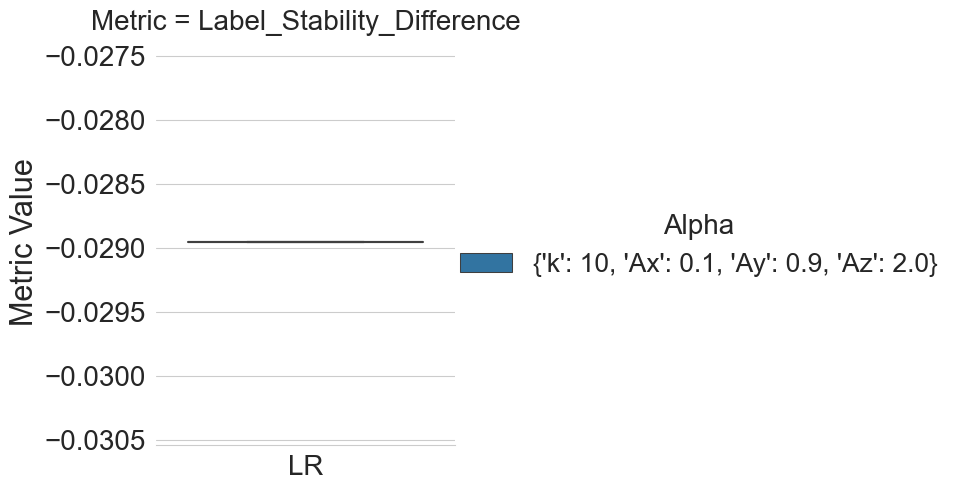

In [18]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Label_Stability_Difference'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

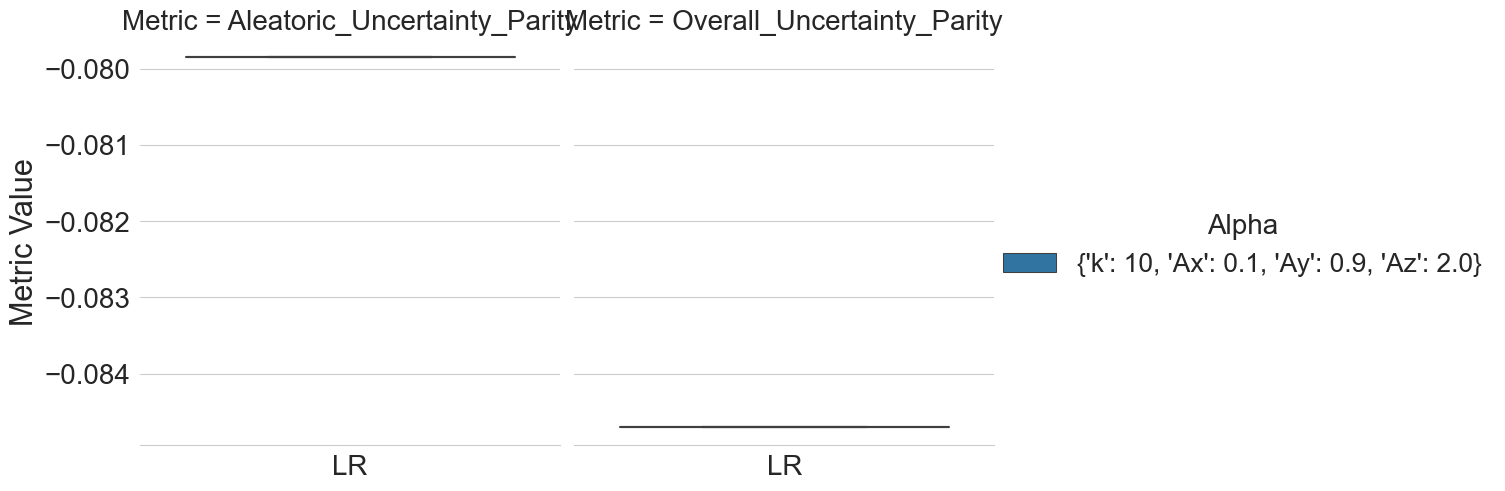

In [19]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Aleatoric_Uncertainty_Parity',
                                                         'Overall_Uncertainty_Parity'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

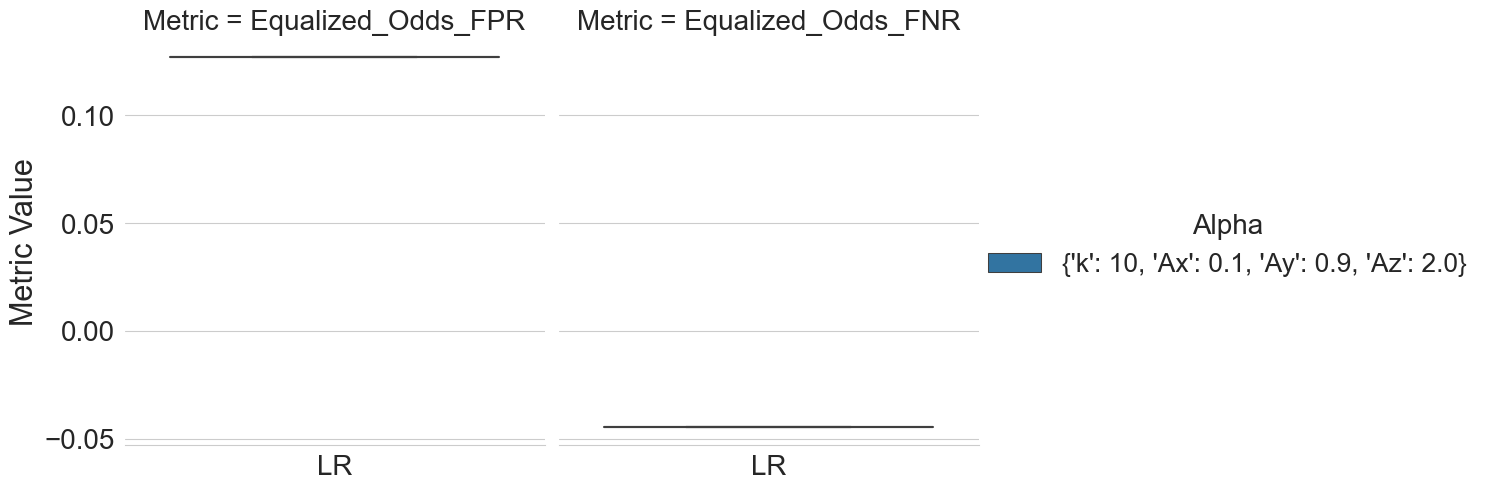

In [20]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Equalized_Odds_FPR', 'Equalized_Odds_FNR'],
                                           vals_to_replace=vals_to_replace)

<Figure size 1200x600 with 0 Axes>

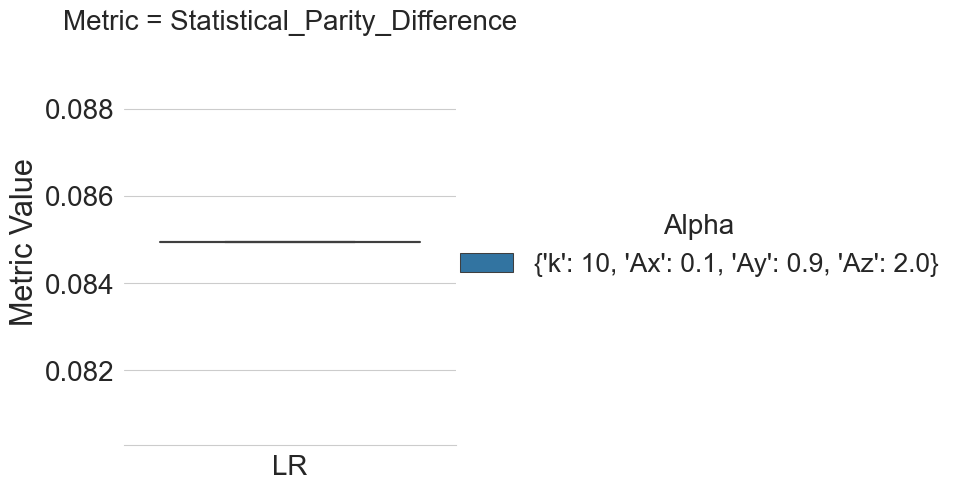

In [21]:
create_group_base_and_fair_models_box_plot(melted_all_group_metrics_per_model_dct,
                                           group='sex',
                                           metric_names=['Statistical_Parity_Difference'],
                                           vals_to_replace=vals_to_replace)